|Name:| Tufan Kundu|
|-|-|
|Registration no:| 24MDT0184|
|Course Name:| Deep Learning Lab|
|Course Code:| PMDS603P|
|Experiment:| 8|
|Date:| 18 September,2025|

## Question 1: First try to fit a basic CNN model to accomplish the same task.Import necessary modules and classes first. Load the CIFAR 10 dataset and normalize the data and reshape. Now you can check the shape of xtrain and xtest etc which you are loading. we need to provide 32 × 32 × 3 images to the CNN. Next compile the model and fit the model and check the performance. Also include early stopping in your model. Since we have a classification problem we have to use the softmax activation in the final layer.

### Importing the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

2025-09-22 07:01:41.466626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758524501.799542      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758524501.892278      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Loading and preprocessing the dataset

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Displaying random images from the dataset

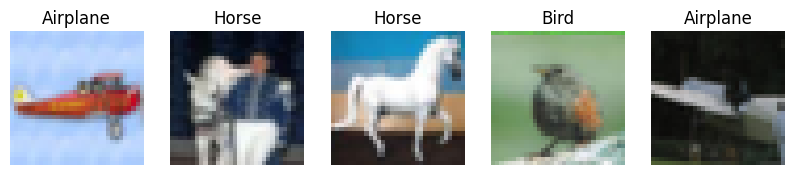

In [3]:
class_names = ["Airplane","Automobile","Bird","Cat","Deer",
"Dog","Frog","Horse","Ship","Truck"]

indices = np.random.choice(len(x_train), size = 5, replace = False)
plt.figure(figsize = (2*5,3))
for i,idx in enumerate(indices):
    ax = plt.subplot(1,5,i+1)
    img = x_train[idx]
    plt.imshow(img)
    label = class_names[y_train[idx][0]]
    plt.title(label)
    plt.axis('off')
plt.show()

### Building the CNN

In [4]:
model = Sequential()
model.add(Conv2D(32,5, strides = (1,1), activation = 'relu', padding='same', input_shape = x_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Dropout(0.5))
model.add(Conv2D(32,3, strides = (1,1), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(64,3, strides = (1,1), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

I0000 00:00:1758524526.043863      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758524526.044545      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,751,018 (14.31 MB)

 Trainable params: 3,751,018 (14.31 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
estop = EarlyStopping(monitor = 'val_loss', min_delta= 1e-4, patience= 5, verbose = 1, restore_best_weights=True)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [6]:
history = model.fit(x_train,y_train,batch_size=128, epochs = 200, verbose = 1, validation_data=(x_test,y_test), callbacks=[estop])

Epoch 1/200


I0000 00:00:1758524532.675782      60 service.cc:148] XLA service 0x79ade000e340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758524532.677284      60 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758524532.677305      60 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758524533.089177      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


 17/391 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0992 - loss: 2.5474

I0000 00:00:1758524538.780024      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.1974 - loss: 2.1412 - val_accuracy: 0.4352 - val_loss: 1.5567
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4373 - loss: 1.5330 - val_accuracy: 0.5071 - val_loss: 1.3733
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5047 - loss: 1.3702 - val_accuracy: 0.5463 - val_loss: 1.2609
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5592 - loss: 1.2411 - val_accuracy: 0.5457 - val_loss: 1.3063
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5835 - loss: 1.1716 - val_accuracy: 0.5649 - val_loss: 1.2374
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6104 - loss: 1.1073 - val_accuracy: 0.5987 - val_loss: 1.1134
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6280 - loss: 1.0520 - val_accuracy: 0.6404 - val_loss: 1.0358
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6495 - loss: 0.9930 - val_accuracy: 0.65

In [7]:
loss, val_accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7251 - loss: 0.7901


In [8]:
print(f"Validation Accuracy of Cifar10 dataset with CNN model: {val_accuracy*100:.4f}%")

Validation Accuracy of Cifar10 dataset with CNN model: 72.4000%


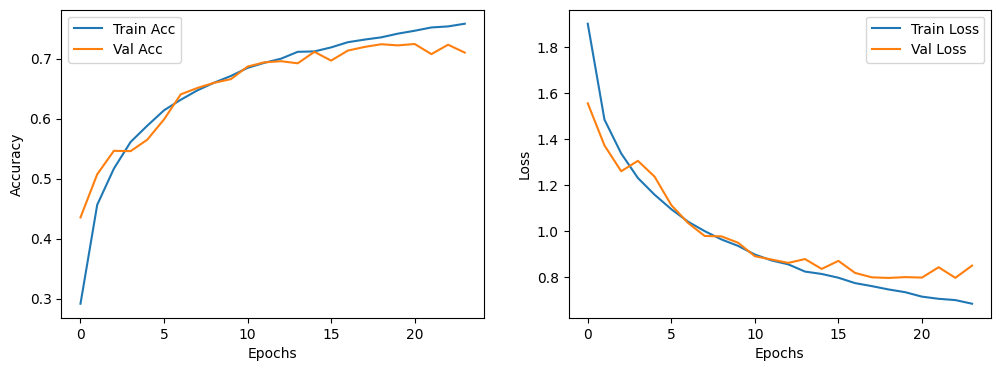

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

## Question 2: Next we will see how you can define a new model incorporating the pre-trained model VGG16 in your model as its part. For that first you have to import the respective model details along with the necessary modules and classes.

### Importing the necessary libraries

In [10]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Resizing, Dropout
from keras.applications import VGG16
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split 
from keras.layers import GlobalAveragePooling2D

### Loading and preprocessing of the dataset

In [11]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3))
for layer in base_model.layers:
    layer.trainable = False
## Building the model
model = Sequential()
model.add(Resizing(224,224, input_shape = (32,32,3)))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

model.summary()
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam', 
    metrics = ['accuracy']
)

estop = EarlyStopping(monitor = 'val_loss', min_delta= 1e-4, patience= 5, verbose = 1, restore_best_weights=True)
history = model.fit(x_train,y_train,batch_size=128, epochs = 200, verbose = 1, validation_data=(x_test,y_test), callbacks=[estop])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,771,548 (56.35 MB)

 Trainable params: 56,860 (222.11 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/200


2025-09-22 07:03:59.900674: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=1,k3=0} for conv (f32[128,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,224,224]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-09-22 07:04:00.167501: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.267004147s
Trying algorithm eng11{k2=1,k3=0} for conv (f32[128,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,224,224]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivat

391/391 ━━━━━━━━━━━━━━━━━━━━ 359s 822ms/step - accuracy: 0.1941 - loss: 2.1650 - val_accuracy: 0.4281 - val_loss: 1.6345
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 286s 731ms/step - accuracy: 0.3755 - loss: 1.6891 - val_accuracy: 0.4951 - val_loss: 1.4140
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 284s 727ms/step - accuracy: 0.4337 - loss: 1.5387 - val_accuracy: 0.5288 - val_loss: 1.3201
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 284s 726ms/step - accuracy: 0.4705 - loss: 1.4653 - val_accuracy: 0.5440 - val_loss: 1.2820
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 286s 731ms/step - accuracy: 0.4826 - loss: 1.4295 - val_accuracy: 0.5642 - val_loss: 1.2317
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 285s 728ms/step - accuracy: 0.5031 - loss: 1.3861 - val_accuracy: 0.5725 - val_loss: 1.2089
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 284s 726ms/step - accuracy: 0.5128 - loss: 1.3609 - val_accuracy: 0.5762 - val_loss: 1.1942
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 284s 727ms/step - accuracy: 0.5156 - los

In [13]:
loss, val_accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 200ms/step - accuracy: 0.6574 - loss: 0.9963


In [14]:
print(f"Validation Accuracy of Cifar10 dataset with CNN model: {val_accuracy*100:.4f}%")

Validation Accuracy of Cifar10 dataset with CNN model: 65.8900%


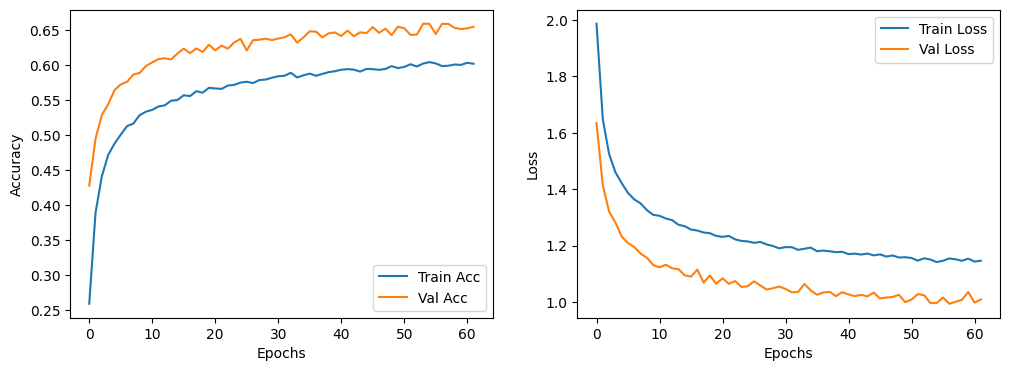

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

## Question 3: Try to use the pre-trained model ResNet50 and design a new model in similar way and report the results obtained.

### Importing the necessary libraries

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Resizing, Dropout, GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
import matplotlib.pyplot as plt


### Loading and preprocessing the dataset

In [17]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,798,172 (90.78 MB)

 Trainable params: 210,460 (822.11 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 205s 460ms/step - accuracy: 0.0983 - loss: 2.3250 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 411ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 411ms/step - accuracy: 0.0963 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 412ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 412ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 412ms/step - accuracy: 0.0972 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.0995 - loss: 2.3026
Validation Accuracy of CIFAR-10 with ResNe

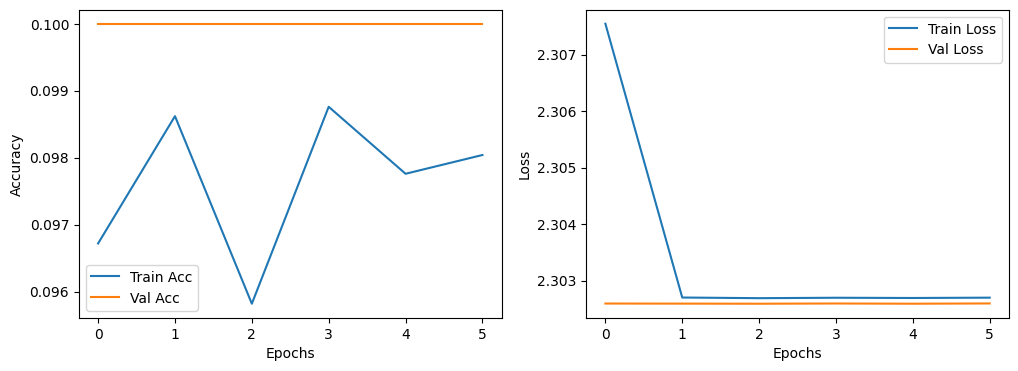

In [18]:
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

for layer in base_model.layers:
    layer.trainable = False
## Building the model
model = Sequential()
model.add(Resizing(224, 224, input_shape=(32, 32, 3)))  
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  

model.summary()

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

estop = EarlyStopping(
    monitor='val_loss',
    min_delta=1e-4,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=200,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[estop]
)

loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy of CIFAR-10 with ResNet50 model: {val_accuracy*100:.4f}%")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()
